In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split

In [2]:
# Load and review data
data = pd.read_csv("concrete.csv")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
# MISSING VALUES
# Replacing '0's with NaN, in slag, ash and superplastic columns as they are likely to be missing values.
data[['slag', 'ash', 'superplastic']] = data[['slag', 'ash', 'superplastic']].replace(0, np.NaN)
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
data.shape

(1030, 9)

In [5]:
#checking for duplicates in the dataset
dupes = data.duplicated()
sum(dupes)

25

In [6]:
#checking for null values in the dataset
data.isnull().sum().sum()

1416

In [7]:
# Five point summary
data.describe(include="all")

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,559.000000,464.000000,1030.000000,651.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,136.158676,120.288793,181.567282,9.816897,972.918932,773.580485,45.662136,35.817961
std,104.506364,72.351823,33.675470,21.354219,4.580328,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,95.000000,97.850000,164.900000,6.950000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,135.700000,121.400000,185.000000,9.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,189.000000,141.000000,192.000000,11.600000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
# quartile 1 = 25%, quartile 2 = 50%, quartile 3 = 75%.

In [9]:
# Fill missing values NaN with median.
new_data = data.fillna(data.median())
new_data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,135.7,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,135.7,121.4,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,121.4,228.0,9.4,932.0,670.0,270,55.06


In [10]:
# Five point summary
new_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,135.948932,120.899417,181.567282,9.663495,972.918932,773.580485,45.662136,35.817961
std,104.506364,53.279837,22.595744,21.354219,3.645923,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,129.800000,121.400000,164.900000,8.200000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,135.700000,121.400000,185.000000,9.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,121.400000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
new_data.mean()

cement          281.167864
slag            135.948932
ash             120.899417
water           181.567282
superplastic      9.663495
coarseagg       972.918932
fineagg         773.580485
age              45.662136
strength         35.817961
dtype: float64

In [12]:
new_data.median()

cement          272.900
slag            135.700
ash             121.400
water           185.000
superplastic      9.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [13]:
# Finding missing values
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [14]:
new_data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

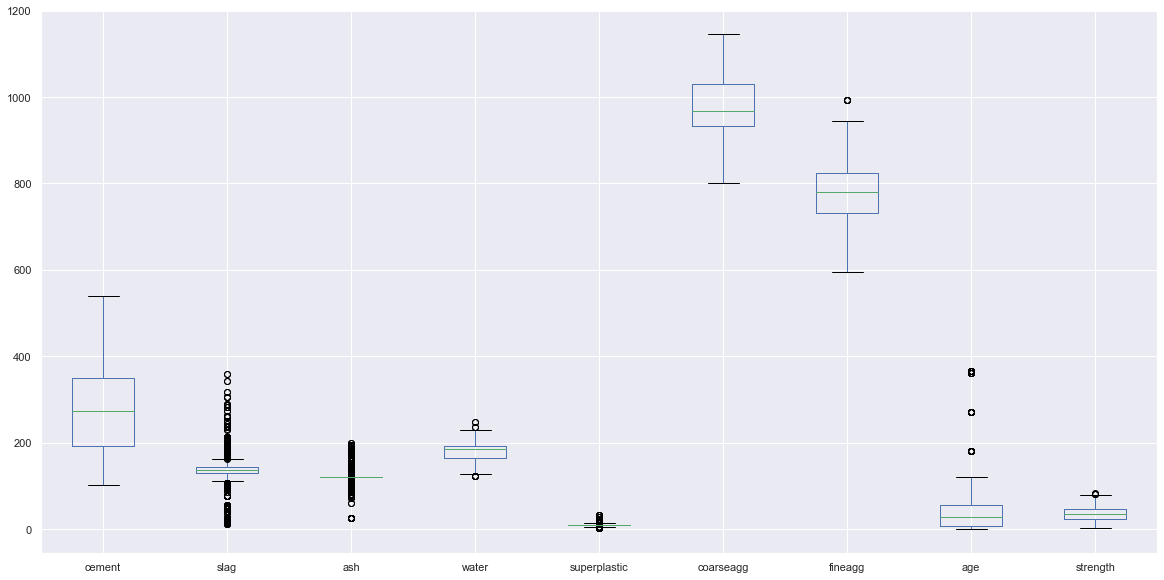

In [15]:
# Box plot for finding outliers in the dataset.
new_data.boxplot(figsize=(20,10))

In [16]:
# Outliers in slag, water, superplastic, fineagg, age, strength are found through box plot.

In [17]:
# Filling outliers 

new_data["slag"]= np.where(new_data["slag"]>=142,142,new_data["slag"])
new_data["slag"]= np.where(new_data["slag"]<=129,129,new_data["slag"])
new_data["ash"]= np.where(new_data["ash"]>=122,122,new_data["ash"])
new_data["ash"]= np.where(new_data["ash"]<=120,120,new_data["ash"])
new_data["water"]=np.where(new_data["water"]>=193,193,new_data["water"])
new_data["water"]=np.where(new_data["water"]<=166,166, new_data["water"])
new_data["superplastic"]=np.where(new_data["superplastic"]>=10,10,new_data["superplastic"])
new_data["superplastic"]=np.where(new_data["superplastic"]<=8,8,new_data["superplastic"])
new_data["fineagg"]= np.where(new_data["fineagg"]>=822,822,new_data["fineagg"])
new_data["age"]= np.where(new_data["age"]>=56,56,new_data["age"])
new_data["strength"]= np.where(new_data["strength"]>=44,44,new_data["strength"])

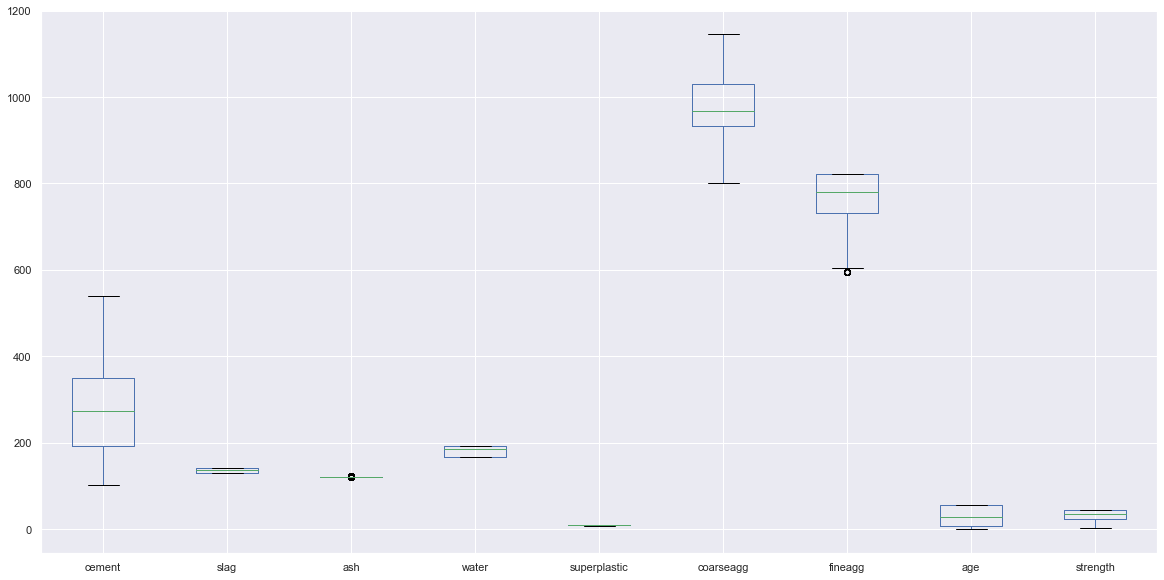

In [18]:
# Box plot for finding outliers in the dataset.
new_data.boxplot(figsize=(20,10))

In [19]:
# Outliers are removed from the dataset by replacing outliers with the corresponding upper quartiles and lower quartiles. 

C:\Users\Kranthi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Kranthi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


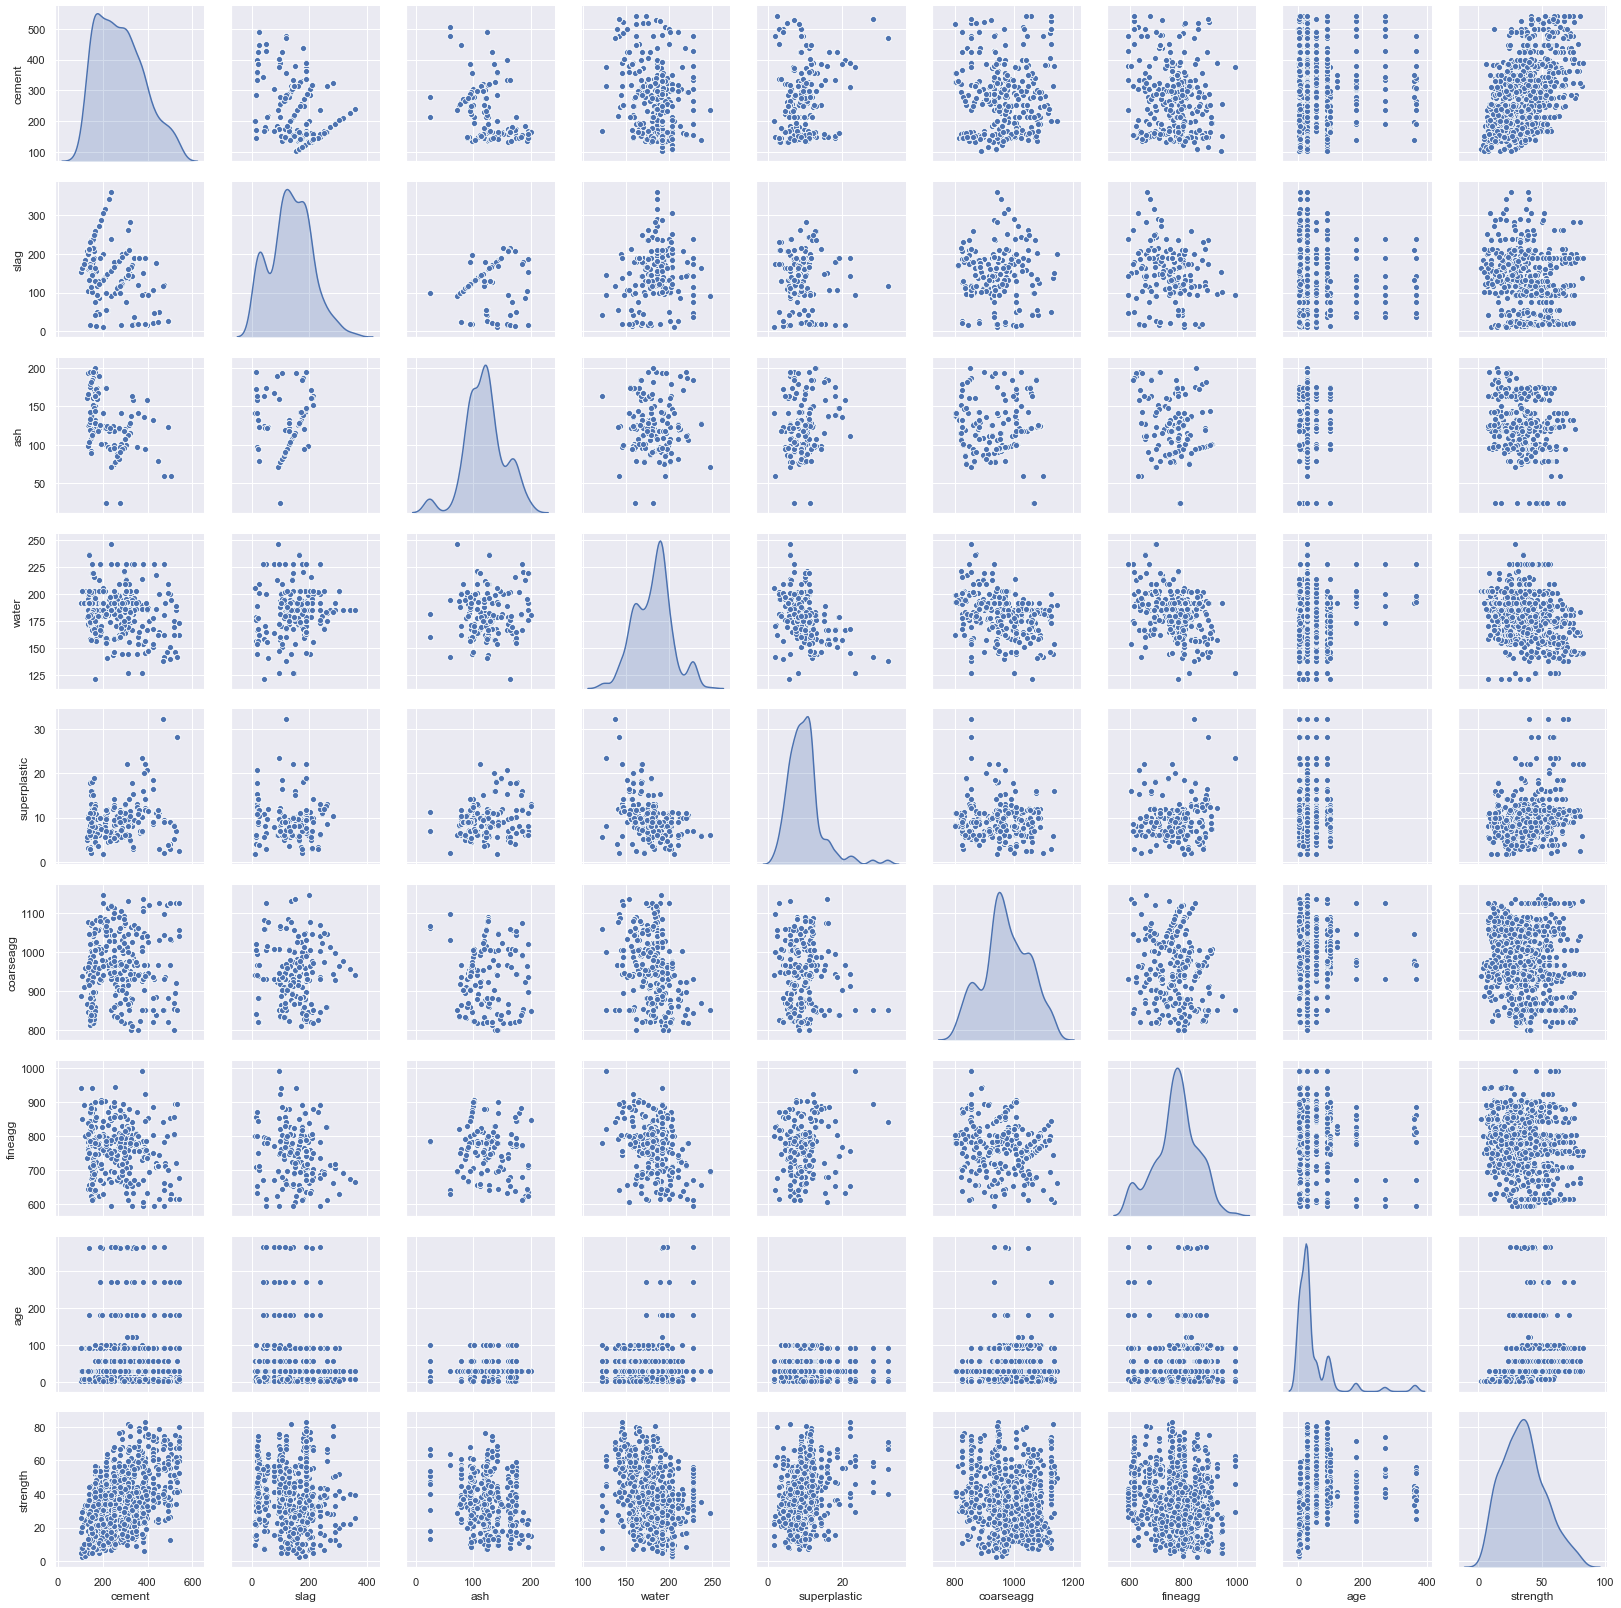

In [20]:
# Pairplot for dataset.
sns.pairplot(data, diag_kind='kde')

In [21]:
# Observations:
# From the above pairplot we can conclude that:
# slag, superplastic, fineagg, stength are left skewed.
# cement and ash are right skewed.
# strength(Target column) and cement, age have positive linear correlation.
# strength(Target column) and ash, superplastic, coarseagg, fineagg have negative linear correlation.
# There are 3 gaussians or more clusters hidden in it.

In [22]:
# Finding Correlation of strength to remaining all independent attributes.
corr = new_data.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.218832,-0.046728,-0.096478,0.237604,-0.109349,-0.257900,0.012689,0.439303
slag,-0.218832,1.000000,0.095269,0.207327,0.091439,0.018848,-0.185650,-0.049678,-0.124788
ash,-0.046728,0.095269,1.000000,-0.024682,0.134095,0.070173,-0.101320,-0.011295,-0.081773
water,-0.096478,0.207327,-0.024682,1.000000,-0.246141,-0.150497,-0.267109,0.004089,-0.301342
superplastic,0.237604,0.091439,0.134095,-0.246141,1.000000,-0.027015,0.001943,-0.011100,0.082485
coarseagg,-0.109349,0.018848,0.070173,-0.150497,-0.027015,1.000000,-0.105455,-0.025063,-0.165873
fineagg,-0.257900,-0.185650,-0.101320,-0.267109,0.001943,-0.105455,1.000000,-0.063477,-0.215816
age,0.012689,-0.049678,-0.011295,0.004089,-0.011100,-0.025063,-0.063477,1.000000,0.602622
strength,0.439303,-0.124788,-0.081773,-0.301342,0.082485,-0.165873,-0.215816,0.602622,1.000000


In [23]:
# Observations:
# cement, superplastic, age have positive correlation with strength.
# ash, water, coarseagg, fineagg have negative correlation with strength.
# ash and superplastic have almost negligable correlation with strength.

In [24]:
# Feature  Engineering techniques:

# Drop slag attribute as it doesnot show any relation with target column(strength)
new_data_1= new_data.drop(['slag'], axis=1)
new_data_1.tail()

,cement,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,122.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,121.4,166.0,10.0,852.1,822.0,3,41.30
1027,276.4,120.0,179.6,8.9,870.1,768.3,28,44.00
1028,342.0,121.4,193.0,9.4,932.0,670.0,56,44.00
1029,540.0,121.4,173.0,9.4,1125.0,613.0,7,44.00


In [25]:
# Standardize the data with zscore.

from scipy.stats import zscore
new_data_z = new_data.apply(zscore)
new_data_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.361702,0.267462,1.067272,0.278435,-0.014398,-0.192949,-0.048510,-0.197819
1,-1.074790,-1.413222,1.132408,-1.329010,1.068846,1.388141,0.553239,-0.784833,-0.752871
2,-0.298384,0.016931,-1.750746,0.570265,-1.565859,-0.206121,0.956838,-0.048510,-0.256108
3,-0.145209,-1.413222,0.267462,1.067272,0.278435,-0.526517,-1.420953,-0.048510,1.029736
4,-1.209776,1.361702,0.267462,1.067272,-0.116771,0.958372,-1.003276,-0.048510,-1.207006


In [26]:
new_data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [27]:
# Split data

x = new_data_z[['cement', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']]
y = new_data_z['strength']

In [28]:
# Split x and y into training and test set in 70:30 ratio.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state= 1)
x_train.head()

,cement,ash,water,superplastic,coarseagg,fineagg,age
185,0.658961,0.267462,1.067272,0.278435,0.013910,0.221600,-0.784833
286,0.888723,0.267462,-0.965130,1.068846,-0.602435,-0.064674,1.424138
600,-0.039901,0.267462,0.889769,0.278435,-0.063294,0.956838,-1.363373
691,0.946164,0.267462,1.067272,0.278435,-0.526517,-2.609849,-1.152995
474,0.716401,1.132408,1.067272,1.068846,-2.212138,0.268530,-0.048510


In [29]:
# Model Building
# Support vector regressor model

from sklearn import svm
clr = svm.SVR()
clr.fit(x_train, y_train)

C:\Users\Kranthi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_pred = clr.predict(x_test)

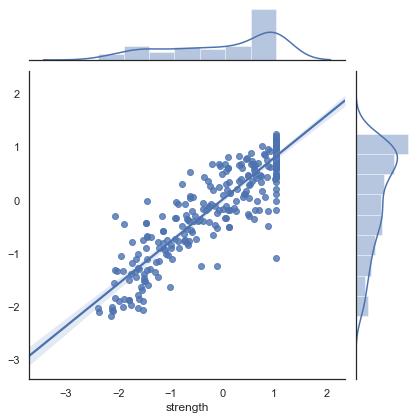

In [31]:
# Joint plot
sns.set(style="darkgrid")

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg");

In [32]:
# KMeans Clustering model

from sklearn.cluster import KMeans
cluster_range = range(2,6)
cluster_errors =[]
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(new_data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1.395057e+07
1,3,1.131435e+07
2,4,9.252534e+06
3,5,7.999555e+06


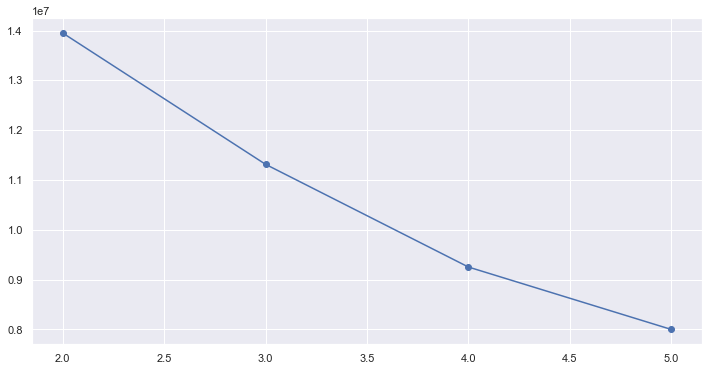

In [33]:
# Elbow Plot

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [34]:
# The elbow plot confirms our visual analysis that there are 3 or 4 good clusters.
# Let us take 3 clusters

In [35]:
cluster = KMeans(n_clusters = 3, random_state = 2354)
cluster.fit(new_data_z)

prediction = cluster.predict(new_data_z)
new_data_z["GROUP"] = prediction

new_data_z_copy = new_data_z.copy(deep=True)

In [36]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.08223657,  0.1482236 , -0.06280454,  0.76119746, -0.33876944,
        -0.23929341, -0.53791043,  0.52126473,  0.43304304],
       [-0.52192231,  0.11994698,  0.16341727,  0.19776738, -0.12020772,
         0.37549362,  0.3397546 , -0.78346117, -1.16959362],
       [ 0.48526962, -0.31729717, -0.10631545, -1.1594866 ,  0.55220362,
        -0.12733678,  0.28050426,  0.23861901,  0.78117111]])

In [37]:
centroids_df = pd.DataFrame(centroids, columns = list(new_data))
centroids_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.082237,0.148224,-0.062805,0.761197,-0.338769,-0.239293,-0.537910,0.521265,0.433043
1,-0.521922,0.119947,0.163417,0.197767,-0.120208,0.375494,0.339755,-0.783461,-1.169594
2,0.485270,-0.317297,-0.106315,-1.159487,0.552204,-0.127337,0.280504,0.238619,0.781171


In [38]:
# Instead of interpreting the numerical values of the centroids, let us do a visual analysis by converting the centroids and  
# the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14A13430>,
      dtype=object)

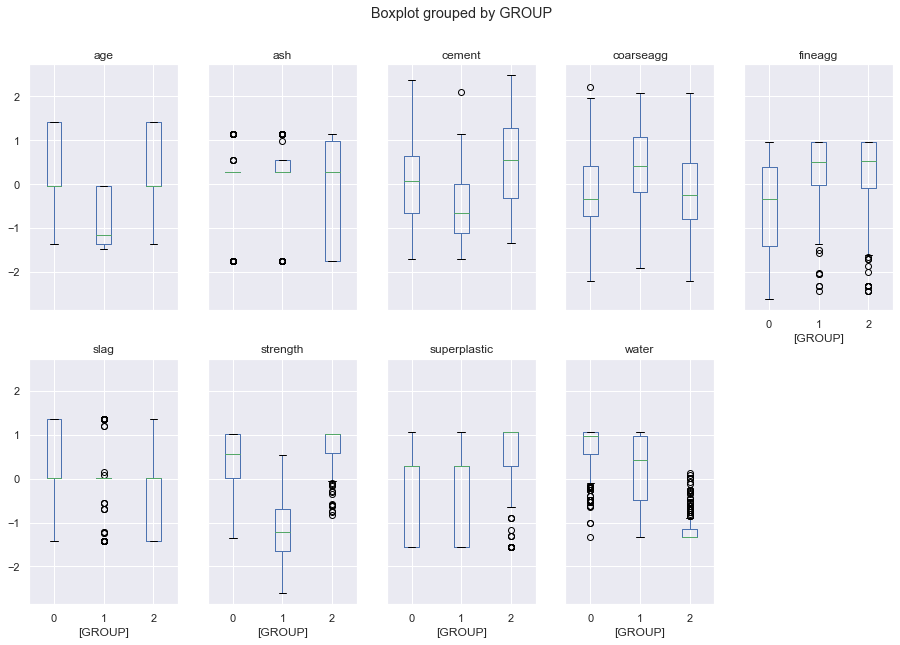

In [39]:
new_data_z.boxplot(by = 'GROUP', layout=(2,5), figsize= (15,10))

In [40]:
# Removing outliers from group.
mydf = new_data_z    
       
def replace(group):
    mean, std = group.mean(), group.std()   
    outliers = (group - mean).abs() > 2*std  
    group[outliers] = group.mean()       
    return group

mydf_corrected = (mydf.groupby('GROUP').transform(replace)) 
concat_mydf = mydf_corrected.join(pd.DataFrame(new_data_z['GROUP']))

C:\Users\Kranthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1509A7F0>,
      dtype=object)

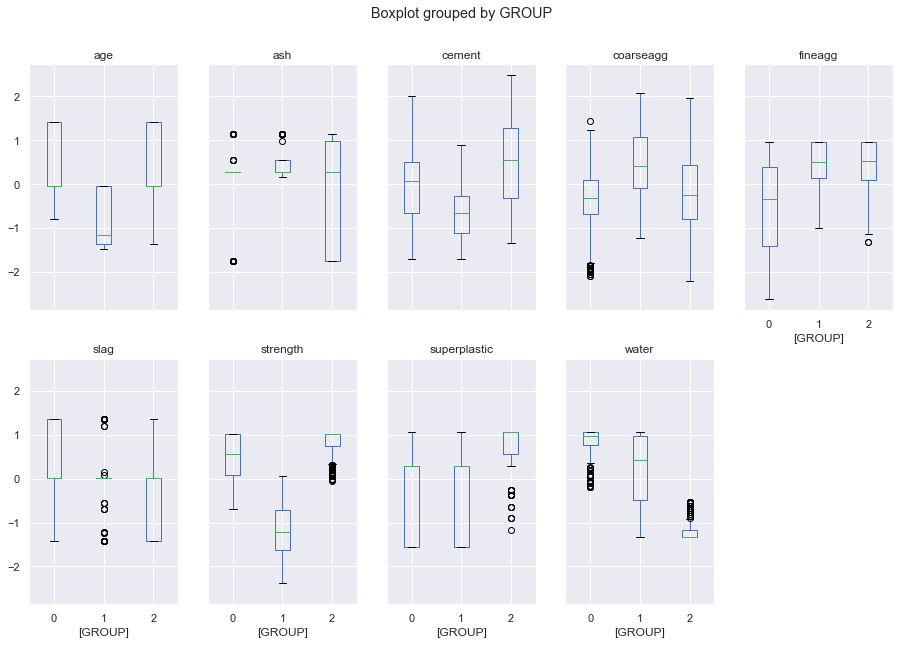

In [41]:
concat_mydf.boxplot(by = 'GROUP', layout=(2,5), figsize=(15, 10))

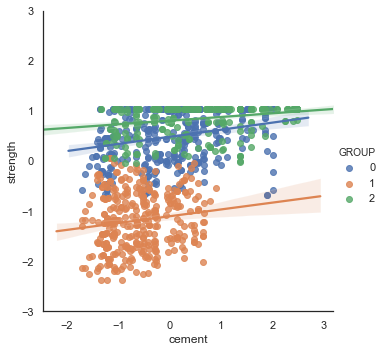

In [42]:
# Target variable vs independent variables.
# strength Vs cement

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_mydf,hue='GROUP')
plot.set(ylim = (-3,3))

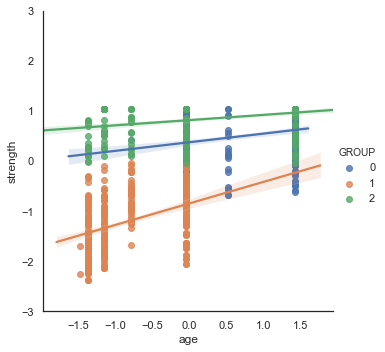

In [43]:
var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_mydf,hue='GROUP')
plot.set(ylim = (-3,3))

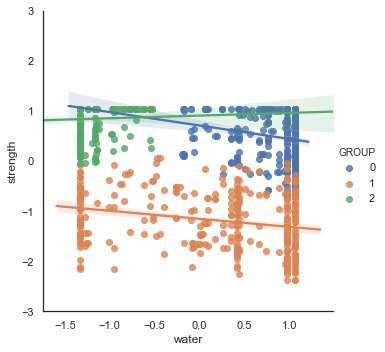

In [44]:
var = 'water'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_mydf,hue='GROUP')
plot.set(ylim = (-3,3))

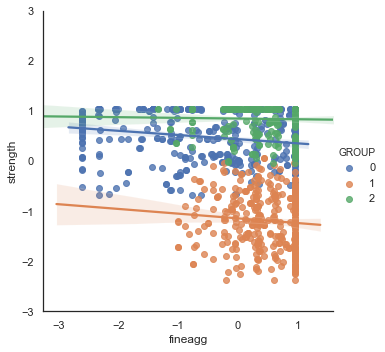

In [45]:
var = 'fineagg'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_mydf,hue='GROUP')
plot.set(ylim = (-3,3))

In [46]:
#k = 3
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [47]:
y_pred = model.predict(x_test)
model.score(x_train, y_train)

0.88834187484542

In [48]:
from sklearn import metrics
acc_KNN = metrics.r2_score(y_test, y_pred)
acc_KNN

0.8079361763917596

In [49]:
#KFold validation

from sklearn.model_selection import KFold, cross_val_score
k =10
kfold = KFold(n_splits=k, random_state =50)
results_ = cross_val_score(model, x,y, cv=kfold)
accuracy=np.mean(abs(results_))
accuracy

0.7788891191534816

In [50]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_pred = model.predict(x_test)
model.score(x_train, y_train)

0.6867454534684794

In [52]:
model.score(x_test, y_test)

0.6703788732079592

In [53]:
k=10
kfold = KFold(n_splits=k, random_state =50)
results_ = cross_val_score(model, x,y, cv=kfold)
accuracy=np.mean(abs(results_))
accuracy

0.6703086951895345

In [54]:
# Fit Linear model

from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred = model.predict(x_test)
model.score(x_train, y_train)

0.6867454534684794

In [56]:
model.score(x_test, y_test)

0.6703788732079592

In [57]:
k=10
kfold = KFold(n_splits=k, random_state =50)
results_ = cross_val_score(model, x,y, cv=kfold)
accuracy=np.mean(abs(results_))
accuracy

0.6703086951895345

In [58]:
# Decision Tree Regressor model

from sklearn.tree import DecisionTreeRegressor
de_model = DecisionTreeRegressor()
de_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [59]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(x_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = new_data.columns[0:8]
print(feature_names)

k = 10

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.34481504 0.         0.04776335 0.         0.         0.
 0.6074216 ]
Index(['fineagg', 'cement', 'ash', 'coarseagg', 'superplastic', 'water',
       'slag'],
      dtype='object') [0.34481504 0.         0.04776335 0.         0.         0.
 0.6074216 ]


In [60]:
y_pred = de_model.predict(x_test)
de_model.score(x_train, y_train)

0.9916637832600984

In [61]:
de_model.score(x_test, y_test)

0.7577550636953612

In [62]:
k=10
kfold = KFold(n_splits=k, random_state =50)
results_ = cross_val_score(model, x,y, cv=kfold)
accuracy=np.mean(abs(results_))
accuracy

0.6703086951895345

In [63]:
# Random Forest Regressor model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

C:\Users\Kranthi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [64]:
y_pred = model.predict(x_test)
model.score(x_train, y_train)

0.9663476737947443

In [65]:
model.score(x_test, y_test)

0.844625580852782

In [66]:
k=10
kfold = KFold(n_splits=k, random_state =50)
results_ = cross_val_score(model, x,y, cv=kfold)
accuracy=np.mean(abs(results_))
accuracy

0.8626290530342384

In [67]:
# Gradient Boost Regressor

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
y_pred = model.predict(x_test)
model.score(x_train, y_train)

0.9240194682897092

In [69]:
model.score(x_test, y_test)

0.843082476299916

In [70]:
k=10
kfold = KFold(n_splits=k, random_state =50)
results_ = cross_val_score(model, x,y, cv=kfold)
accuracy=np.mean(abs(results_))
accuracy

0.8571017563461911

In [71]:
# Building pipeline.

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([(" scaler", MinMaxScaler()), (" svm", SVR())])

In [72]:
pipe.fit( x_train, y_train)

C:\Users\Kranthi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[(' scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                (' svm',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [73]:
print(" Test score: {:.2f}". format( pipe.score( x_test, y_test)))

 Test score: 0.75


In [ ]:
# Observations:
# Model                           Accuracy         K Fold Cross Validation

# KNeighborsRegressor             80.79            77.88
# Support vector Regressor        67.03            67.03
# LinearRegression                67.03            67.03
# Decision Tree Regressor         75.77            67.03
# Random Forest Regressor         84.46            86.26
# Gradient Boost Regressor        84.30            85.71

In [ ]:
# Random Forest Regressor model and Gradient Boost Regressor gave maximum accuracy, followed by KNeighbors regressor.
# Linear Regression and Support vector regressor gave least accuracy.
# Decision Tree Regressor gave medium accuracy.

In [ ]:
# From all the models it is observed that concrete strength is majorly dependent on cement, age and water.
# cement and age are positively correlated with strength.
# 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg' are negatively correlated with 'strength'.